In [1]:
import torch
import requests
import zipfile
import random 
import torchvision
import numpy as np
import pandas as pd
from torch import nn
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import random
from PIL import Image
from PIL import Image
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [2]:
torch.__version__, torchvision.__version__

('2.6.0+cpu', '0.21.0+cpu')

In [3]:
#gettting data from the datasets

In [4]:
data_path = Path("Food_data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"{image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading food data")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping food data") 
        zip_ref.extractall(image_path)

Food_data\pizza_steak_sushi directory exists.


In [5]:
#Function to go in folders

In [6]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Food_data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'Food_data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'Food_data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'Food_data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'Food_data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'Food_data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'Food_data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'Food_data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'Food_data\pizza_steak_sushi\train\sushi'.


In [8]:
train_dir=image_path/"train"
test_dir=image_path/"test"

In [9]:
train_dir, test_dir

(WindowsPath('Food_data/pizza_steak_sushi/train'),
 WindowsPath('Food_data/pizza_steak_sushi/test'))

In [10]:
image_path

WindowsPath('Food_data/pizza_steak_sushi')

In [11]:
from PIL import Image
randome_seed=42
#gettimng all image in a list
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

[WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('Food_data/pizza_steak_sushi/test/piz

Random image path: Food_data\pizza_steak_sushi\train\steak\2629750.jpg
Image class: steak
Image height: 512
Image width: 512


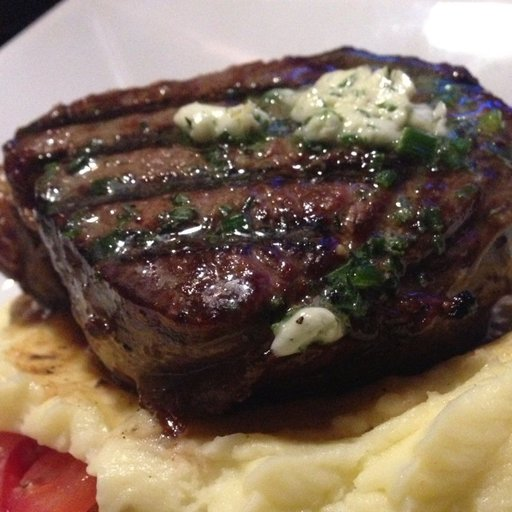

In [12]:
import random
from PIL import Image
# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)


# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [13]:
#making images as arrray

In [14]:
image_as_array=np.asarray(img)
image_as_array

array([[[ 16,  14,  19],
        [ 18,  16,  21],
        [ 18,  16,  21],
        ...,
        [235, 226, 227],
        [235, 226, 227],
        [235, 226, 227]],

       [[ 20,  18,  23],
        [ 22,  20,  25],
        [ 22,  20,  25],
        ...,
        [238, 229, 230],
        [237, 228, 229],
        [237, 228, 229]],

       [[ 20,  18,  23],
        [ 22,  20,  25],
        [ 23,  21,  26],
        ...,
        [238, 232, 232],
        [237, 231, 231],
        [236, 230, 230]],

       ...,

       [[164,  38,  52],
        [160,  34,  48],
        [160,  32,  47],
        ...,
        [186, 164, 106],
        [186, 164, 106],
        [186, 164, 106]],

       [[165,  40,  54],
        [160,  35,  49],
        [160,  33,  50],
        ...,
        [183, 161, 101],
        [184, 162, 102],
        [185, 163, 103]],

       [[173,  48,  62],
        [167,  42,  56],
        [166,  39,  56],
        ...,
        [184, 162, 102],
        [185, 163, 103],
        [185, 163, 103]]

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

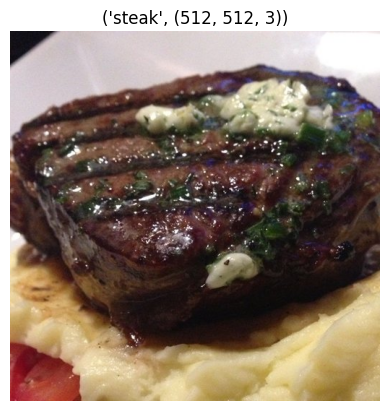

In [15]:
plt.imshow(image_as_array)
plt.title((image_class, image_as_array.shape))
plt.axis(False)

# Tranforming the image data to tensor  and Resizing it

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [18]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

In [19]:
data_transform(img)

tensor([[[0.0784, 0.0706, 0.0667,  ..., 0.9882, 0.9843, 0.9765],
         [0.0745, 0.0706, 0.0667,  ..., 1.0000, 1.0000, 1.0000],
         [0.0745, 0.0745, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6275, 0.6471, 0.6510,  ..., 0.7686, 0.7882, 0.7882],
         [0.6275, 0.6471, 0.6667,  ..., 0.7882, 0.7961, 0.7961],
         [0.6314, 0.6510, 0.6784,  ..., 0.7765, 0.7804, 0.7647]],

        [[0.0667, 0.0667, 0.0627,  ..., 0.9804, 0.9725, 0.9608],
         [0.0667, 0.0667, 0.0627,  ..., 1.0000, 1.0000, 1.0000],
         [0.0627, 0.0627, 0.0667,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1373, 0.1765, 0.2549,  ..., 0.6745, 0.7020, 0.7020],
         [0.1255, 0.1686, 0.2157,  ..., 0.7020, 0.7098, 0.7098],
         [0.1216, 0.1529, 0.1882,  ..., 0.6824, 0.6902, 0.6784]],

        [[0.0902, 0.0941, 0.0902,  ..., 0.9843, 0.9725, 0.9647],
         [0.0902, 0.0941, 0.0902,  ..., 1.0000, 1.0000, 1.0000],
         [0.0824, 0.0863, 0.0941,  ..., 1.0000, 1.0000, 1.

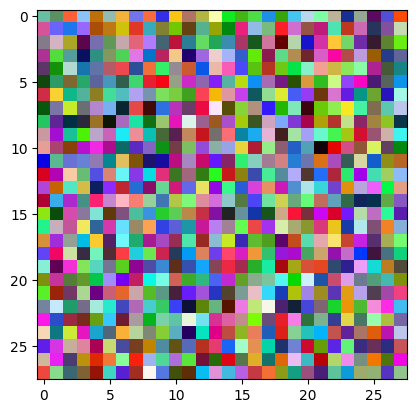

In [20]:
random_image = np.random.rand(28, 28, 3)
plt.imshow(random_image)
plt.show()

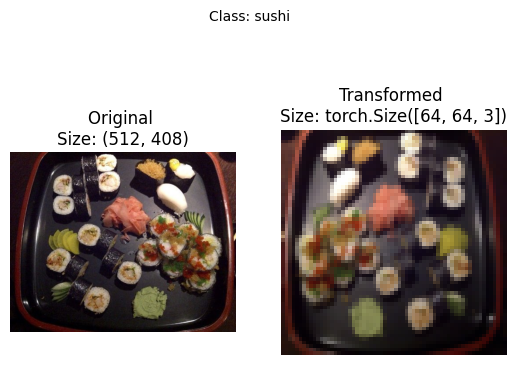

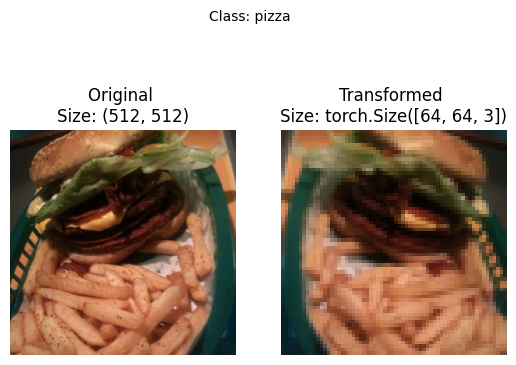

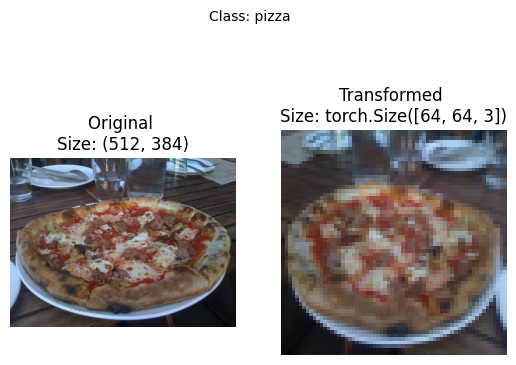

In [21]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=10)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

# Loading the image data using ImagFolder of Datasets

In [22]:
train_data=datasets.ImageFolder(root=train_dir,
                               transform=data_transform,
                               target_transform=None)
test_data= datasets.ImageFolder(root=test_dir,
                               transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Food_data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Food_data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [23]:
train_dir, test_dir

(WindowsPath('Food_data/pizza_steak_sushi/train'),
 WindowsPath('Food_data/pizza_steak_sushi/test'))

In [24]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [25]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [26]:
len(train_data), len(test_data)

(225, 75)

In [27]:
img, label = train_data[0][0], train_data[0][1]
img.shape, img.size(), img.dtype

(torch.Size([3, 64, 64]), torch.Size([3, 64, 64]), torch.float32)

In [28]:
label,type(label)

(0, int)

# Turning train_data and Test data into dataloader

In [29]:
Batch_size=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=Batch_size,
                            num_workers=1, 
                            shuffle=True)
test_dataloader= DataLoader(dataset= test_data,
                            batch_size=Batch_size,
                            num_workers=1,
                            shuffle=False)

In [30]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x174d0057a10>,
 <torch.utils.data.dataloader.DataLoader at 0x174d2789e50>)

In [31]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [32]:
len(train_data), len(test_data)

(225, 75)

In [33]:
img, label = next(iter(train_dataloader))
img.shape
label.shape

torch.Size([32])

In [34]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [35]:
test_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [36]:
[image_path_list[:5]]

[[WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1152100.jpg'),
  WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1503858.jpg'),
  WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1687143.jpg'),
  WindowsPath('Food_data/pizza_steak_sushi/test/pizza/1925494.jpg'),
  WindowsPath('Food_data/pizza_steak_sushi/test/pizza/194643.jpg')]]

In [37]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Food_data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Food_data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

# Neww  # Instance of torchvision.datasets.ImageFolder()

In [38]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [39]:
# Setup directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: Food_data\pizza_steak_sushi\train
Class names found: ['pizza', 'steak', 'sushi']


In [40]:
# find classes in target dir
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [41]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [42]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx # return data, label (X, y)

In [43]:
# Augmentation of training data and reshaping tests
train_transforms = transforms.Compose([transforms.Resize((64, 64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize((64, 64)),
                                      transforms.ToTensor()])

In [44]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x174d0056660>,
 <__main__.ImageFolderCustom at 0x174d278b390>)

In [45]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [46]:
#Cheking a random image

In [47]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [48]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=32, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=32,
                                    shuffle=False) 
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x174d278b250>,
 <torch.utils.data.dataloader.DataLoader at 0x174cfeafce0>)

In [49]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape}")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


In [50]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

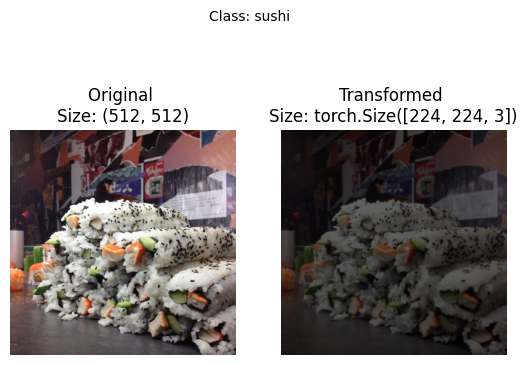

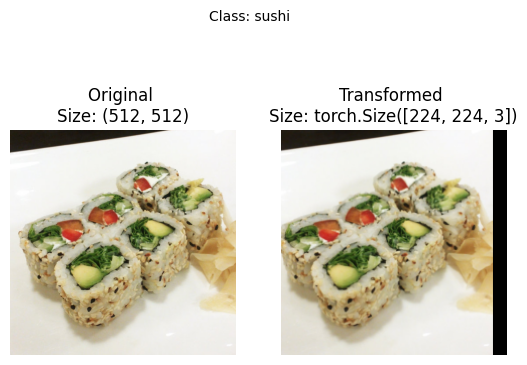

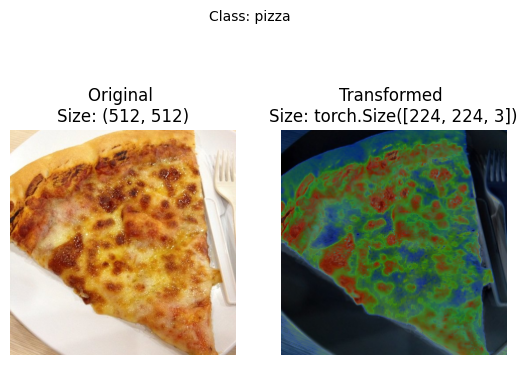

In [51]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [52]:
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize((64, 64)),transforms.ToTensor(),])

In [53]:
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)


BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 8 workers.


(<torch.utils.data.dataloader.DataLoader at 0x174cfeaf5c0>,
 <torch.utils.data.dataloader.DataLoader at 0x174d27a56d0>)

In [54]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.classifier = nn.Sequential(
            nn.Flatten(),  
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape))

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [55]:
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3,hidden_units=10, output_shape=len(train_data.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [56]:
# Making Training and testing functions

In [57]:
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [58]:
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()            
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [59]:
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []}
    
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    return results

In [60]:
torch.manual_seed(42) 
epochs=5

model_1= TinyVGG(input_shape=3,
                  hidden_units=10, 
                  output_shape=len(train_data.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=epochs)

Epoch: 1 | train_loss: 1.2180 | train_acc: 0.2500 | test_loss: 1.1973 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0989 | train_acc: 0.4141 | test_loss: 1.1055 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1014 | train_acc: 0.2930 | test_loss: 1.1091 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0940 | train_acc: 0.4141 | test_loss: 1.1126 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0996 | train_acc: 0.2930 | test_loss: 1.1190 | test_acc: 0.1979


In [61]:
from torchinfo import summary
summary(model_1,input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [62]:
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [63]:
#Plotting the Curve

In [64]:
def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

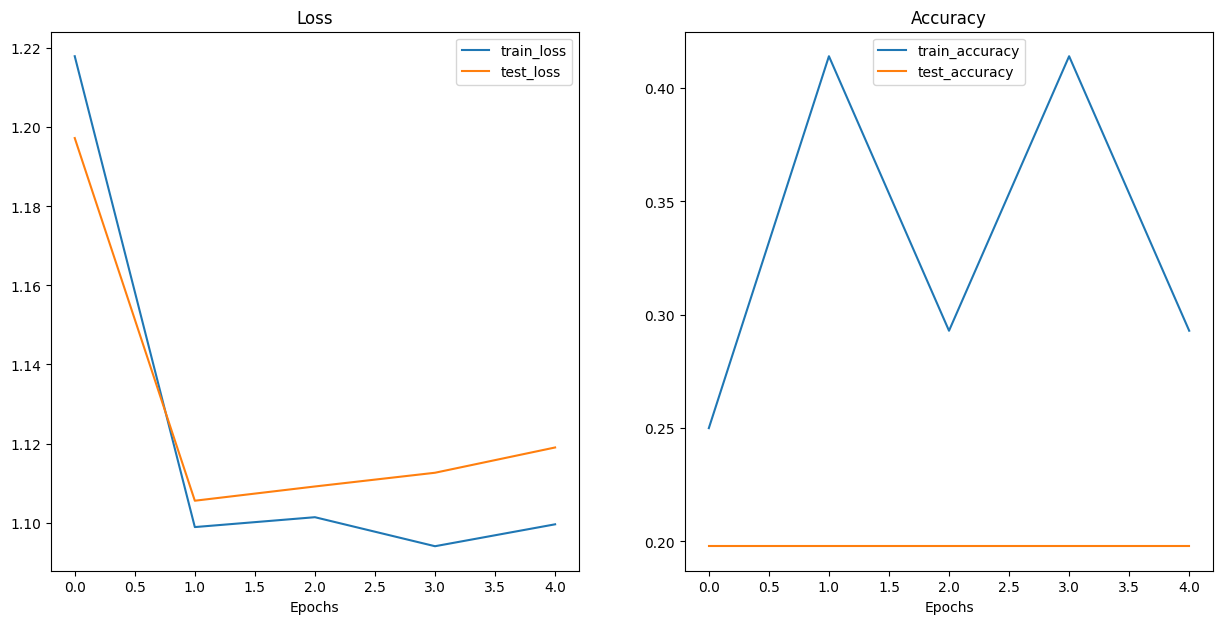

In [65]:
plot_loss_curves(model_1_results)

# Making New

In [66]:
# Create training transform
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() ])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()])

In [67]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Food_data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Food_data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [68]:
batch_size=32
num_workers=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_dataloader_simple = DataLoader(test_data_simple, batch_size=batch_size, shuffle=False, num_workers=num_workers)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x174d02dcd10>,
 <torch.utils.data.dataloader.DataLoader at 0x174d2789e50>)

In [69]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_2 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes))
model_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [70]:
torch.manual_seed(42) 
epochs = 5

model_2 = TinyVGG(input_shape=3,
                  hidden_units=10, 
                  output_shape=len(train_data.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01) 

model_2_results = train(model=model_2, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=epochs)

Epoch: 1 | train_loss: 1.2474 | train_acc: 0.2617 | test_loss: 1.2033 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.4258 | test_loss: 1.1037 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1014 | train_acc: 0.2930 | test_loss: 1.1076 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0944 | train_acc: 0.4141 | test_loss: 1.1111 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0997 | train_acc: 0.2930 | test_loss: 1.1175 | test_acc: 0.1979


In [71]:
#Model2 Loss curve

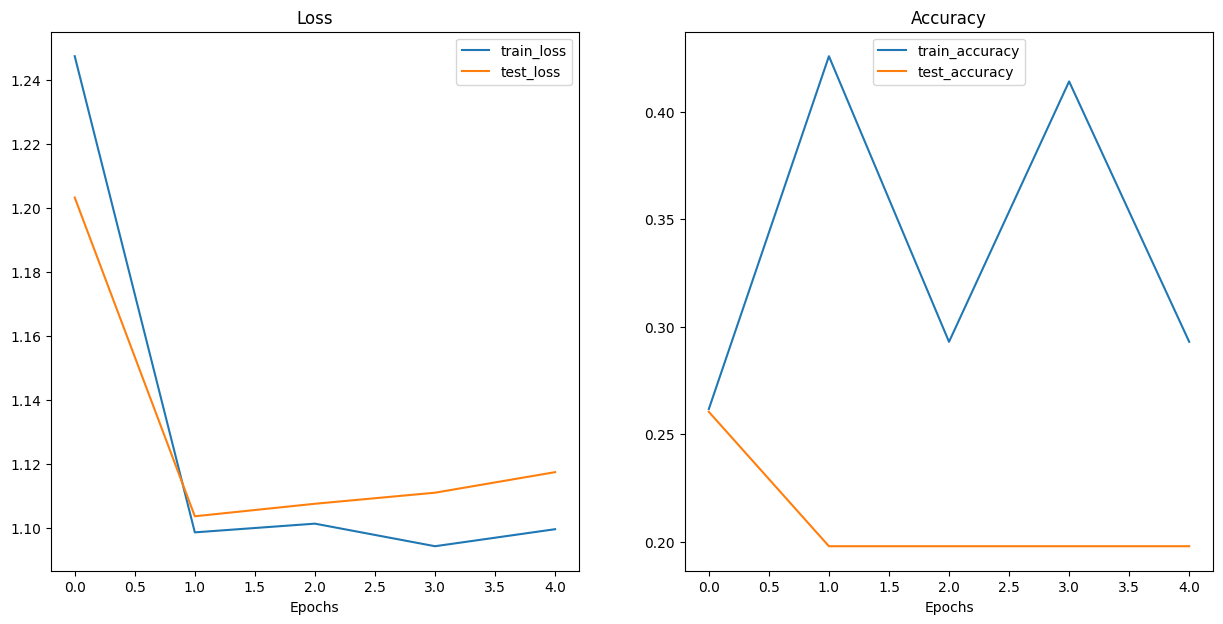

In [72]:
plot_loss_curves(model_2_results)

In [73]:
#comparing

In [74]:
model_1_df = pd.DataFrame(model_1_results)
model_2_df = pd.DataFrame(model_2_results)
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.218000,0.250000,1.197295,0.197917
1,1.098857,0.414062,1.105525,0.197917
2,1.101355,0.292969,1.109133,0.197917
3,1.094013,0.414062,1.112604,0.197917
4,1.099557,0.292969,1.118999,0.197917


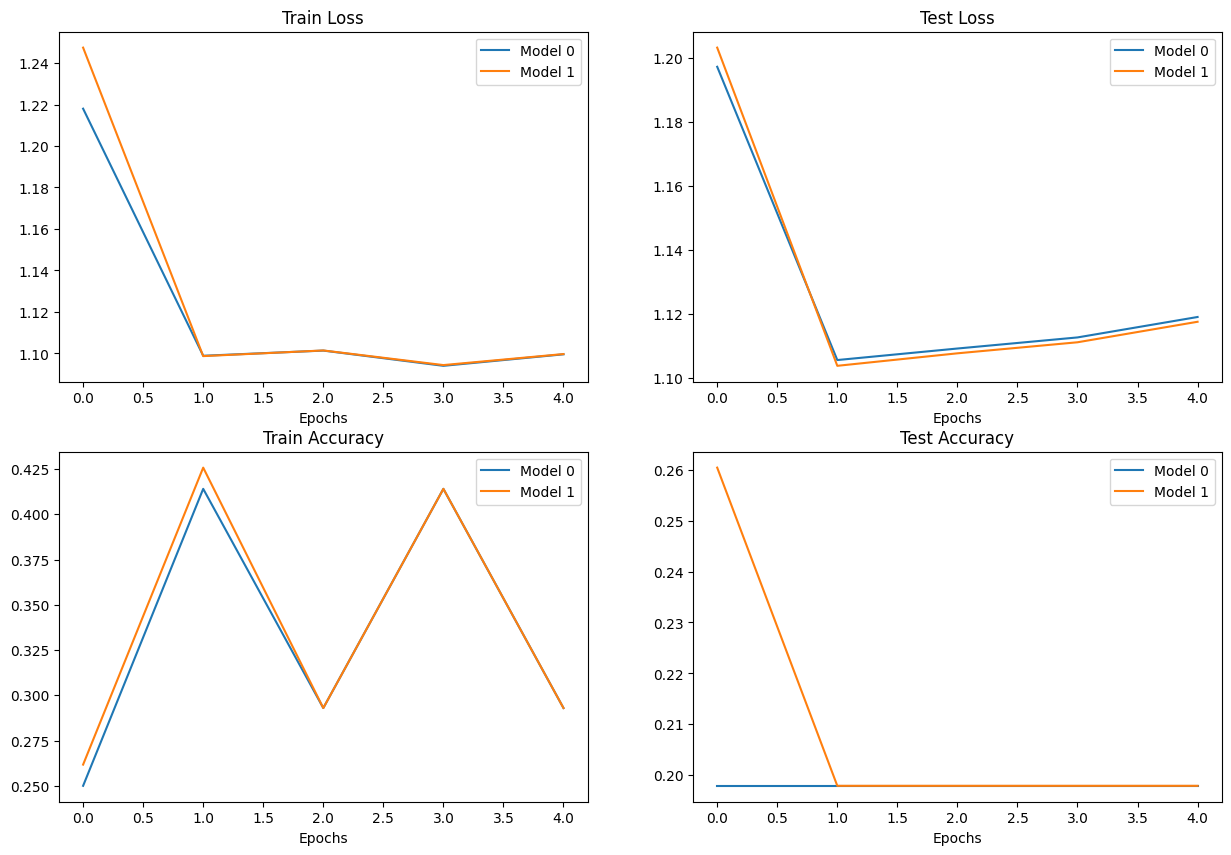

In [77]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_1_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_1_df["train_loss"], label="Model 0")
plt.plot(epochs, model_2_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_1_df["test_loss"], label="Model 0")
plt.plot(epochs, model_2_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_1_df["train_acc"], label="Model 0")
plt.plot(epochs, model_2_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_1_df["test_acc"], label="Model 0")
plt.plot(epochs, model_2_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();